In [1]:
import numpy as np
import pandas as pd
from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation
from sklearn.preprocessing import MinMaxScaler #normalisation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import animation, colors

In [2]:
# Helper functions

# Data Normalisation
def minmax_scaler(data):
  scaler = MinMaxScaler()
  scaled = scaler.fit_transform(data)
  return scaled

# Euclidean distance
def e_distance(x,y):
  return distance.euclidean(x,y)

# Manhattan distance
def m_distance(x,y):
  return distance.cityblock(x,y)

# Best Matching Unit search
def winning_neuron(data, t, som, num_rows, num_cols):
  winner = [0,0]
  shortest_distance = np.sqrt(data.shape[1]) # initialise with max distance
  input_data = data[t]
  for row in range(num_rows):
    for col in range(num_cols):
      distance = e_distance(som[row][col], data[t])
      if distance < shortest_distance: 
        shortest_distance = distance
        winner = [row,col]
  return winner

# Learning rate and neighbourhood range calculation
def decay(step, max_steps,max_learning_rate,max_m_dsitance):
  coefficient = 1.0 - (np.float64(step)/max_steps)
  learning_rate = coefficient*max_learning_rate
  neighbourhood_range = ceil(coefficient * max_m_dsitance)
  return learning_rate, neighbourhood_range

In [3]:
# hyperparameters
num_rows = 10
num_cols = 10
max_m_dsitance = 4
max_learning_rate = 0.5
max_steps = int(7.5*10e3)

# num_nurons = 5*np.sqrt(train_x.shape[0])
# grid_size = ceil(np.sqrt(num_nurons))
# print(grid_size)

In [4]:
# banknote authentication Data Set
# https://archive.ics.uci.edu/ml/datasets/banknote+authentication
# Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. 
# Irvine, CA: University of California, School of Information and Computer Science.

'''
data_file = pd.read_table('shuttle.tst', sep=' ', header=None)

df2.head()
print("valores NA:", sum(df2.isna()), "\n")
print("valores null", sum(df2.isnull()), "\n")
print(df2.isna().sum(), "\n")
print(df2.isnull().sum())
print("\n")
print(df.isnull().any(axis=1).sum())
'''
#data_file = pd.read_table('shuttle.txt', sep=' ', header=None)
data_file = "shuttle.tst"
#data_file.head()

data_x = np.loadtxt(data_file, delimiter=" ", skiprows=0, usecols=range(0,9) ,dtype=np.float64)
data_y = np.loadtxt(data_file, delimiter=" ", skiprows=0, usecols=(9,),dtype=np.int64)


# ACÁ ESTABAN LAS LIBRERÍAS ENTREMEDIO

In [5]:
# train and test split
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=42)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape) # check the shapes

(11600, 9) (11600,) (2900, 9) (2900,)


In [6]:
#mian function

train_x_norm = minmax_scaler(train_x) # normalisation

# initialising self-organising map
num_dims = train_x_norm.shape[1] # numnber of dimensions in the input data
np.random.seed(40)
som = np.random.random_sample(size=(num_rows, num_cols, num_dims)) # map construction

# start training iterations
for step in range(max_steps):
  if (step+1) % 1000 == 0:
    print("Iteration: ", step+1) # print out the current iteration for every 1k
  learning_rate, neighbourhood_range = decay(step, max_steps,max_learning_rate,max_m_dsitance)

  t = np.random.randint(0,high=train_x_norm.shape[0]) # random index of traing data
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  for row in range(num_rows):
    for col in range(num_cols):
      if m_distance([row,col],winner) <= neighbourhood_range:
        som[row][col] += learning_rate*(train_x_norm[t]-som[row][col]) #update neighbour's weight

print("SOM training completed")

Iteration:  1000
Iteration:  2000
Iteration:  3000
Iteration:  4000
Iteration:  5000
Iteration:  6000
Iteration:  7000
Iteration:  8000
Iteration:  9000
Iteration:  10000
Iteration:  11000
Iteration:  12000
Iteration:  13000
Iteration:  14000
Iteration:  15000
Iteration:  16000
Iteration:  17000
Iteration:  18000
Iteration:  19000
Iteration:  20000
Iteration:  21000
Iteration:  22000
Iteration:  23000
Iteration:  24000
Iteration:  25000
Iteration:  26000
Iteration:  27000
Iteration:  28000
Iteration:  29000
Iteration:  30000
Iteration:  31000
Iteration:  32000
Iteration:  33000
Iteration:  34000
Iteration:  35000
Iteration:  36000
Iteration:  37000
Iteration:  38000
Iteration:  39000
Iteration:  40000
Iteration:  41000
Iteration:  42000
Iteration:  43000
Iteration:  44000
Iteration:  45000
Iteration:  46000
Iteration:  47000
Iteration:  48000
Iteration:  49000
Iteration:  50000
Iteration:  51000
Iteration:  52000
Iteration:  53000
Iteration:  54000
Iteration:  55000
Iteration:  56000
I

In [7]:
# collecting labels

#train_y = df2
label_data = train_y
map = np.empty(shape=(num_rows, num_cols), dtype=object)

for row in range(num_rows):
  for col in range(num_cols):
    map[row][col] = [] # empty list to store the label

for t in range(train_x_norm.shape[0]):
  if (t+1) % 1000 == 0:
    print("sample data: ", t+1)
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron

sample data:  1000
sample data:  2000
sample data:  3000
sample data:  4000
sample data:  5000
sample data:  6000
sample data:  7000
sample data:  8000
sample data:  9000
sample data:  10000
sample data:  11000


In [12]:
# # construct label map
# label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
# for row in range(num_rows):
#   for col in range(num_cols):
#     label_list = map[row][col]
#     if len(label_list)==0:
#       label = 2
#     else:
#       label = max(label_list, key=label_list.count)
#     label_map[row][col] = label

# title = ('Iteration ' + str(max_steps))
# cmap = colors.ListedColormap(['tab:green', 'tab:red', 'tab:orange'])
# plt.imshow(label_map, cmap=cmap)
# plt.colorbar()
# plt.title(title)
# plt.show()

Started at:  17:09:07
Iteration:  1000  at : 17:11:21
Iteration:  2000  at : 17:11:29
Iteration:  3000  at : 17:11:37
Iteration:  4000  at : 17:11:44
Iteration:  5000  at : 17:11:52
Iteration:  6000  at : 17:12:00
Iteration:  7000  at : 17:12:07
Iteration:  8000  at : 17:12:15
Iteration:  9000  at : 17:12:23
Iteration:  10000  at : 17:12:31
Iteration:  11000  at : 17:12:39
Iteration:  12000  at : 17:12:46
Iteration:  13000  at : 17:12:54
Iteration:  14000  at : 17:13:02
Iteration:  15000  at : 17:13:10
Iteration:  16000  at : 17:13:17
Iteration:  17000  at : 17:13:25
Iteration:  18000  at : 17:13:33
Iteration:  19000  at : 17:13:41
Iteration:  20000  at : 17:13:48
Iteration:  21000  at : 17:13:56
Iteration:  22000  at : 17:14:04
Iteration:  23000  at : 17:14:11
Iteration:  24000  at : 17:14:19
Iteration:  25000  at : 17:14:26
Iteration:  26000  at : 17:14:34
Iteration:  27000  at : 17:14:41
Iteration:  28000  at : 17:14:49
Iteration:  29000  at : 17:14:56
Iteration:  30000  at : 17:15:

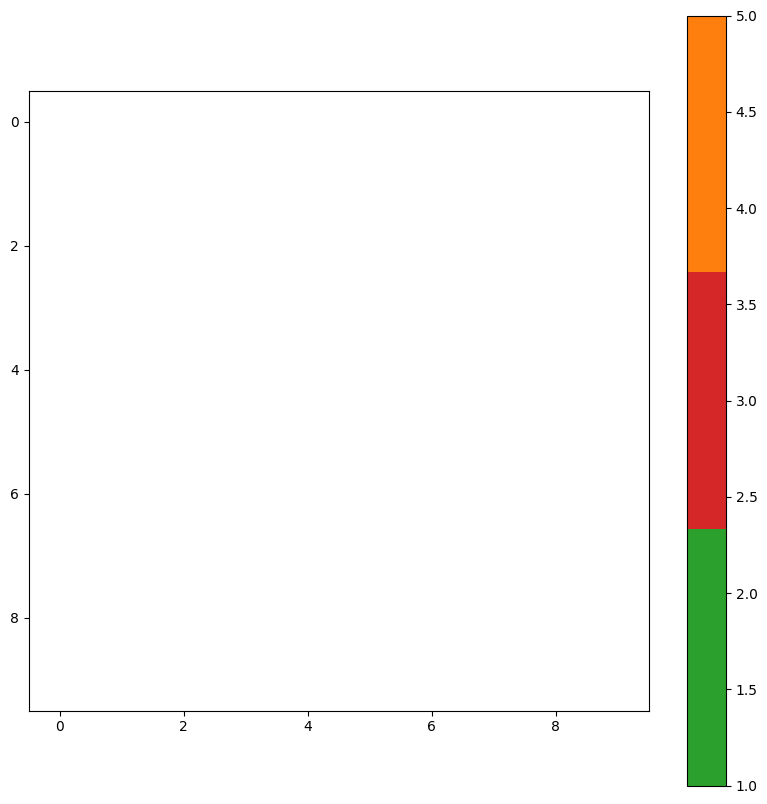

In [8]:
#som training
from datetime import datetime
print("Started at: ", datetime.now().strftime("%H:%M:%S"))

train_x_norm = minmax_scaler(train_x) # normalisation

# initialising self-organising map
num_dims = train_x_norm.shape[1] # numnber of dimensions in the input data
np.random.seed(40)
som = np.random.random_sample(size=(num_rows, num_cols, num_dims)) # map construction

fig = plt.figure(figsize=(num_rows, num_cols))
ax = fig.add_subplot(111)
images = []
cbar_initialized = False
cmap = colors.ListedColormap(['tab:green', 'tab:red', 'tab:orange'])

lr = []
nr = []

# start training iterations
for step in range(max_steps):
  if (step+1) % 1000 == 0 and step > 0:
    print("Iteration: ", step+1, " at :", datetime.now().strftime("%H:%M:%S")) # print out the current iteration for every 1k
  learning_rate, neighbourhood_range = decay(step, max_steps,max_learning_rate,max_m_dsitance)

  lr.append(learning_rate)
  nr.append(neighbourhood_range)

  t = np.random.randint(0,high=train_x_norm.shape[0]) # random index of traing data
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  for row in range(num_rows):
    for col in range(num_cols):
      if m_distance([row,col],winner) <= neighbourhood_range:
        som[row][col] += learning_rate*(train_x_norm[t]-som[row][col])

  if (step ==0) or (step < 1001 and (step+1) %50 ==0) or (step+1) % 1000 == 0:
    # data labelling
    label_data = train_y
    map = np.empty(shape=(num_rows, num_cols), dtype=object)
    for row in range(num_rows):
      for col in range(num_cols):
        map[row][col] = [] # empty list to store the label
        #for t in range(data.shape[0]):
    for t in range(train_x_norm.shape[0]):
      winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
      map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron
    label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
    for row in range(num_rows):
      for col in range(num_cols):
        label_list = map[row][col]
        if len(label_list)==0:
          label = 2
        else:
          label = max(label_list, key=label_list.count)
        label_map[row][col] = label
    current_step = step + 1
    title = ax.text(0.5, 1.01, 'Iteration '+str(current_step)+' (max '+str(max_steps)+' iteration)' , ha='center', va='bottom',transform=ax.transAxes, fontsize='large')
    #image = ax.imshow(map_label, cmap=plt.cm.get_cmap('Accent',3))
    image = ax.imshow(label_map, cmap=cmap)
    if not cbar_initialized:
        cbar_initialized = True # initialise the colour bar only once
        fig.colorbar(image, ax=ax)
    images.append([image]+[title])

# Generate the animation image and save
animated_image = animation.ArtistAnimation(fig, images)
animated_image.save('./som_training.gif', writer='pillow')

print("SOM training completed")

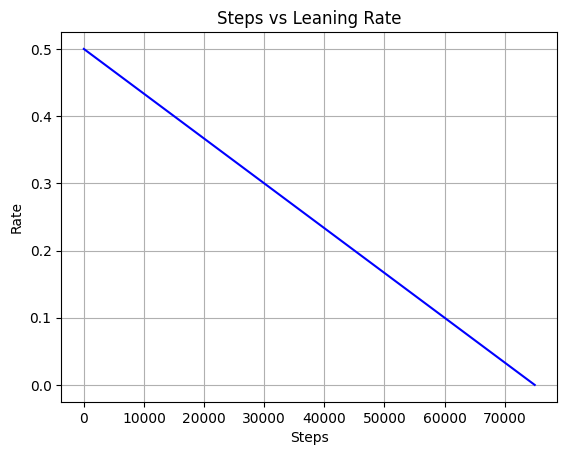

In [9]:
x = [step+1 for step in range(max_steps)]
y1 = lr

plt.plot(x, y1, color='blue')
plt.title('Steps vs Leaning Rate', fontsize=12)
plt.xlabel('Steps', fontsize=10)
plt.ylabel('Rate', fontsize=10)
plt.grid(True)
plt.show()

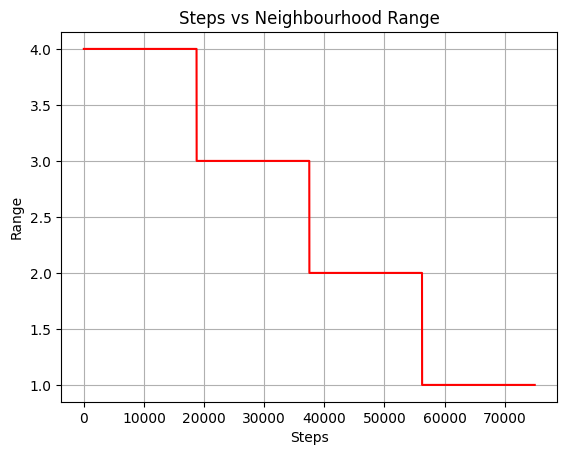

In [10]:
x = [step+1 for step in range(max_steps)]
y2 = nr

plt.plot(x, y2, color='red')
plt.title('Steps vs Neighbourhood Range', fontsize=12)
plt.xlabel('Steps', fontsize=10)
plt.ylabel('Range', fontsize=10)
plt.grid(True)
plt.show()

In [11]:
# test data

# using the trained som, search the winning node of corresponding to the test data
# get the label of the winning node

data = minmax_scaler(test_x) # normalisation

winner_labels = []

for t in range(data.shape[0]):
 winner = winning_neuron(data, t, som, num_rows, num_cols)
 row = winner[0]
 col = winner[1]
 predicted = label_map[row][col]
 winner_labels.append(predicted)

print("Accuracy: ", accuracy_score(test_y, np.array(winner_labels)))

Accuracy:  0.8613793103448276
